In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2    
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score, roc_curve, roc_auc_score , auc



In [114]:
final_data = pd.read_csv('C:\\Users\\MR\\Documents\\Heart_Disease_Project\\data\\feature_selection_preprocessed_data.csv')
final_data

,PC1,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,1.108265,-0.700899,0.301111,0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,0.032225,0.344283,0.196894,0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,0.121233,0.142862,0.052773,-0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,-0.081043,-0.617978,0.342487,0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,0.268812,0.469796,0.341791,-0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,-0.271537,-1.102780,0.547618,-0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,-0.198322,-0.710955,-0.726882,0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,-0.672151,0.089254,-0.446223,-0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-0.178727,-0.341713,-0.655132,-0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [115]:
x= final_data.drop('condition', axis=1)
y= final_data['condition']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42, stratify=y,)
 


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.87      0.96      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61
 

Accuracy: 0.9180327868852459
Precision: 0.8709677419354839
Recall: 0.9642857142857143
F1 Score: 0.9152542372881356
AUC Score: 0.9215367965367965
[0.         0.         0.         0.         0.         0.06060606
 0.06060606 0.06060606 0.06060606 0.06060606 0.09090909 0.09090909
 0.12121212 0.12121212 0.12121212 0.12121212 0.18181818 0.21212121
 0.27272727 0.36363636 0.54545455 0.66666667 0.72727273 0.81818182
 0.90909091 0.93939394 1.        ]
[0.         0.03571429 0.10714286 0.32142857 0.35714286 0.35714286
 0.5        0.67857143 0.75       0.78571429 0.78571429 0.82142857
 0.82142857 0.85714286 0.92857143 0.96428571 0.96428571 1.
 1.   

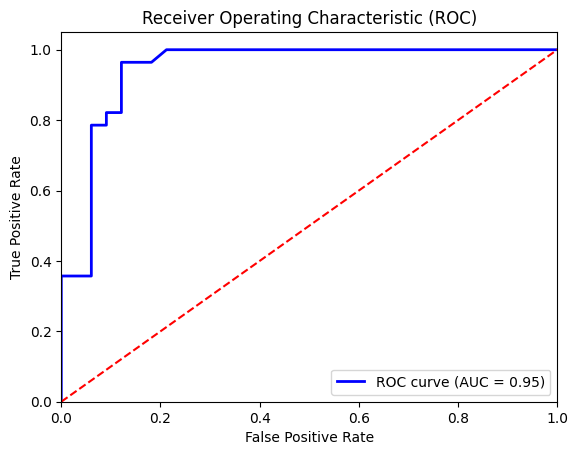

In [116]:
RF_model =  RandomForestClassifier(random_state=42)
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred),'\n')
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))
print('AUC Score:', roc_auc_score(y_test, y_pred))

y_pred_prob = RF_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61
 

Accuracy: 0.8852459016393442
Precision: 0.8387096774193549
Recall: 0.9285714285714286
F1 Score: 0.8813559322033898
AUC Score: 0.8885281385281386
[0.         0.         0.         0.03030303 0.03030303 0.06060606
 0.06060606 0.09090909 0.09090909 0.12121212 0.12121212 0.15151515
 0.15151515 0.21212121 0.21212121 0.33333333 0.33333333 1.        ]
[0.         0.03571429 0.60714286 0.60714286 0.67857143 0.67857143
 0.82142857 0.82142857 0.85714286 0.85714286 0.89285714 0.89285714
 0.92857143 0.92857143 0.96428571 0.96428571 1.         1.        ]
[       inf 0.99049885 0.89183544 0.86591799 0.83987287 0.77089298
 0.68863016 0.65602553 0.615407

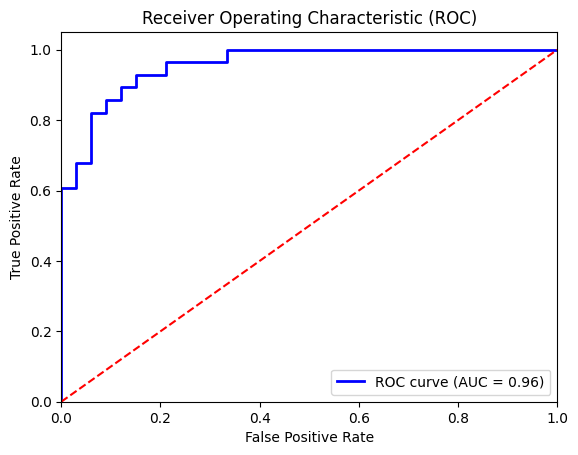

In [117]:
LR=LogisticRegression(random_state=42)
LR.fit(x_train,y_train)
y_pred =LR.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred),'\n')
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))
print('AUC Score:', roc_auc_score(y_test, y_pred))

y_pred_prob = LR.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61
 

Accuracy: 0.9016393442622951
Precision: 0.84375
Recall: 0.9642857142857143
F1 Score: 0.9
AUC Score: 0.9063852813852814
[0.         0.         0.         0.03030303 0.03030303 0.09090909
 0.09090909 0.42424242 0.42424242 1.        ]
[0.         0.03571429 0.53571429 0.53571429 0.64285714 0.64285714
 0.96428571 0.96428571 1.         1.        ]
[       inf 0.95719989 0.87626424 0.85860393 0.83470672 0.75231018
 0.54324398 0.24353748 0.18177952 0.05986767]
AUC: 0.9523809523809523


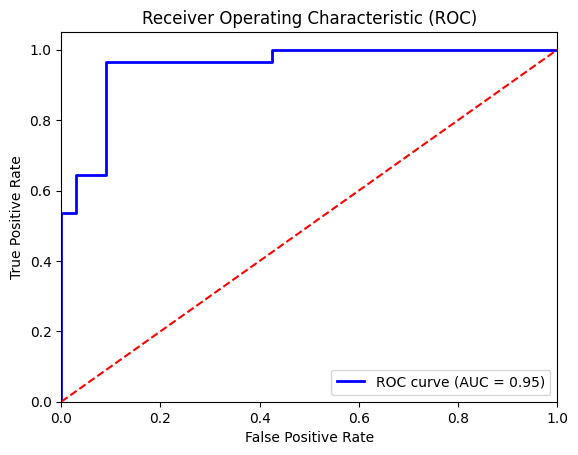

In [118]:
SVC=SVC(random_state=42,probability=True)
SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred),'\n')
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))
print('AUC Score:', roc_auc_score(y_test, y_pred))

y_pred_prob = SVC.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61
 

Accuracy: 0.9016393442622951
Precision: 0.84375
Recall: 0.9642857142857143
F1 Score: 0.9
AUC Score: 0.9063852813852814
[0.         0.15151515 1.        ]
[0.         0.96428571 1.        ]
[inf  1.  0.]
AUC: 0.9063852813852814


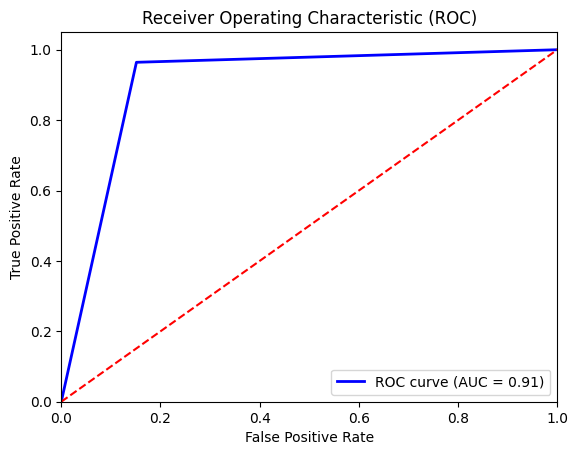

In [119]:
DT=DecisionTreeClassifier(random_state=42)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred),'\n')
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))
print('AUC Score:', roc_auc_score(y_test, y_pred))

y_pred_prob = DT.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)
print('AUC:', auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [120]:
joblib.dump(RF_model, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\RF_MODEL.pkl')
joblib.dump(LR, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\LR.pkl')
joblib.dump(SVC, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\SVC.pkl')
joblib.dump(DT, 'C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\DT.pkl')

['C:\\Users\\MR\\Documents\\Heart_Disease_Project\\models\\DT.pkl']